# Optional Step
# Explore elastic deformation augmentations

Load an example image with the corresponding annotations and change parameters to determine which configuration makes realistic deformations for your dataset.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io

import utils.augmentation

# Configuration
Select one image with the corresponding expected output (boundary labels)

In [7]:
input_image_filename = "DATA/raw_images/IXMtest_P24_s9_w13AC6C03C-E8D7-4A23-B649-514BB4052F52.tif"
output_image_filename = "DATA/boundary_labels/IXMtest_P24_s9_w13AC6C03C-E8D7-4A23-B649-514BB4052F52.png"

# Auxiliary visualization function

In [8]:
def display(im1, im2, p, d, params=None):
    fig, ax = plt.subplots(1,2, figsize=(18,12))
    ax[0].imshow(im1)
    ax[1].imshow(im2)
    ax[0].set_title('Points {} Distort {}'.format(p, d))
    if params is not None:
        ax[0].plot(params["tform"].inverse(params["src"])[:, 0], params["tform"].inverse(params["src"])[:, 1], '.y')
        ax[0].axis((0, params["out_cols"], params["out_rows"], 0))
        ax[1].plot(params["tform"].inverse(params["src"])[:, 0], params["tform"].inverse(params["src"])[:, 1], '.y')
        ax[1].axis((0, params["out_cols"], params["out_rows"], 0))
    plt.show()

# Show original images

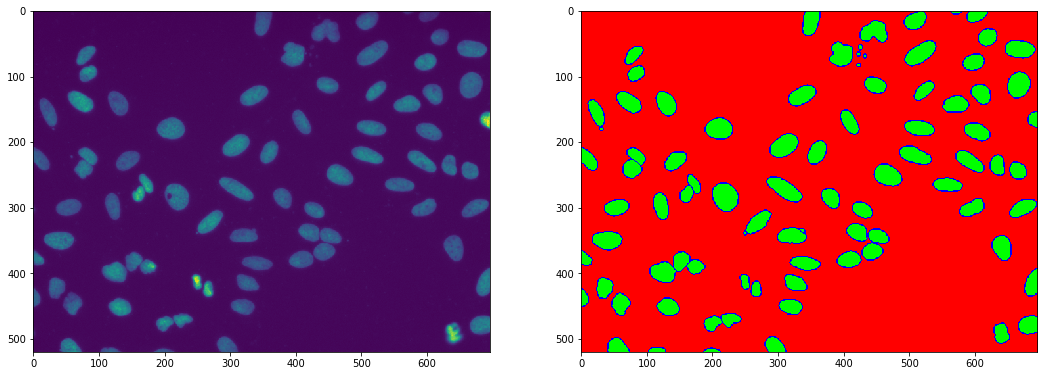

In [9]:
x = skimage.io.imread(input_image_filename)
y = skimage.io.imread(output_image_filename)

fig, ax = plt.subplots(1,2, figsize=(18,12))
ax[0].imshow(x)
ax[1].imshow(y)

# Generate example augmented images
Change the four parameters below to explore different configurations 

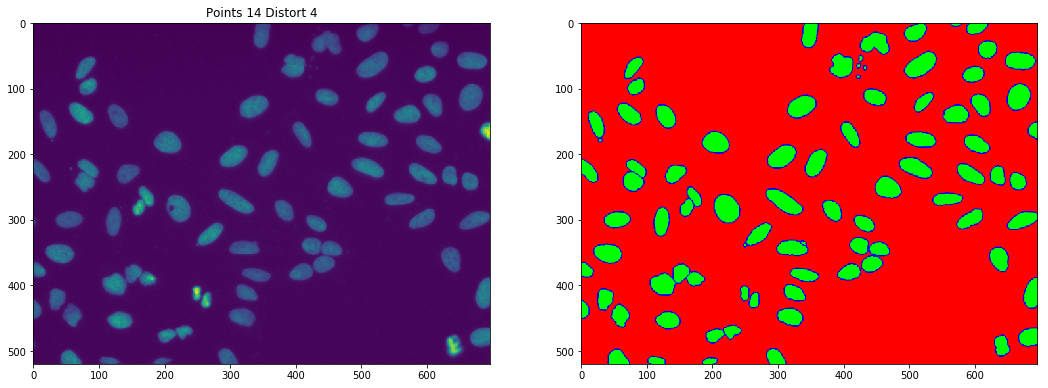

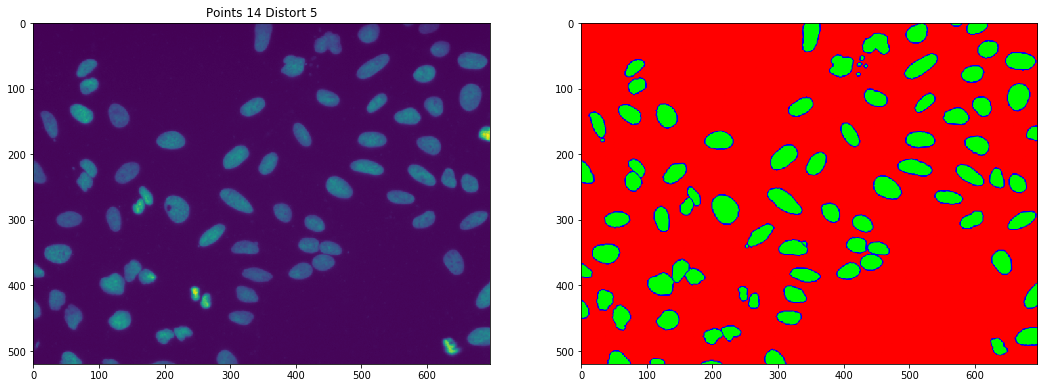

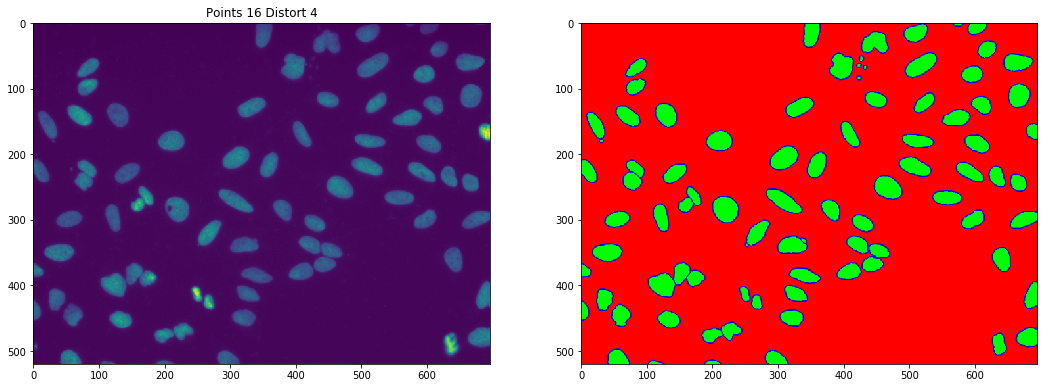

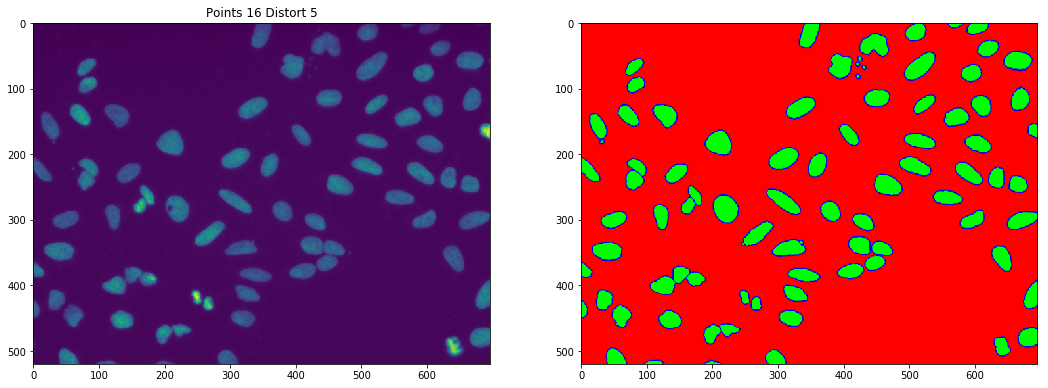

In [10]:
points_from = 14
points_to = 18
distortion_from = 4
distortion_to = 6

for i in range(points_from, points_to, 2):
    for j in range(distortion_from, distortion_to, 1):
        out1, out2 = utils.augmentation.deform(x, y, points=i, distort=j)
        display(out1, out2, i, j)

# Estimate computational cost of augmentations
Elastic deformations are not computed online during training. They are pre-computed and stored.

In [11]:
%timeit out1, out2 = utils.augmentation.deform(x, y, points=20, distort=6)

3.37 s ± 83.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
from config import config_vars
import utils.dirtools
import imp
imp.reload(utils.dirtools)

<module 'utils.dirtools' from '/home/lanbowen23/Instance/unet4nuclei/unet4nuclei/utils/dirtools.py'>

In [13]:
utils.dirtools.read_data_partitions(config_vars)

{'training': ['IXMtest_A06_s6_w1B9577918-4973-4A87-BA73-A168AA755527.png',
  'IXMtest_A15_s5_w1825174D4-ED30-490C-9635-6196417D6C9D.png',
  'IXMtest_A16_s3_w1032BE329-E21B-4E1B-B4B8-58700685EE0C.png',
  'IXMtest_A18_s1_w1BFDF1C94-9C1F-4F5F-BBC1-05196333B1BF.png',
  'IXMtest_A20_s4_w153DE191F-B112-471B-AC0A-FAD27990714B.png',
  'IXMtest_A21_s1_w1D8BF2790-C628-4109-94AF-DF6D8A3480B6.png',
  'IXMtest_A24_s9_w152CD6793-DA45-4975-869A-CBD49D645E37.png',
  'IXMtest_B12_s9_w1ABE4C6B8-6110-4D7D-B782-94C43FDC2E1F.png',
  'IXMtest_B20_s2_w159B9FE71-035A-4DED-B0CA-C76916C968BC.png',
  'IXMtest_B21_s3_w141E785B1-44FE-4ED0-9CCE-6FF076EFE9FE.png',
  'IXMtest_B21_s4_w1521471E0-9BD7-492A-8739-9C782C2585B0.png',
  'IXMtest_B21_s7_w1276972A2-1794-4A98-8E76-876A597C346B.png',
  'IXMtest_B22_s6_w19397283D-2426-4942-8A0F-EB75E1D48C2D.png',
  'IXMtest_B22_s8_w10754C18F-B059-47B4-A423-FF429B984D80.png',
  'IXMtest_B23_s1_w152C21D3B-75A9-4FF9-839A-23E6CE19AEEC.png',
  'IXMtest_C02_s4_w1661FF37C-AB9B-4038-BDF3